<a href="https://colab.research.google.com/github/bghaendler/BJBS-AI-Lab/blob/master/Diff_Describe_by_Column.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd

def diff_describe_by_col(df1, df2):
    res = {}
    object_cols = [col for col in df1.columns if df1[col].dtype != 'object']
    for col in object_cols:
        #print(col)
        desc_df1 = df1[col].describe()
        desc_df2 = df2[col].describe()
        diff_count = desc_df1['count'] - desc_df2['count']
        diff_mean = desc_df1['mean'] - desc_df2['mean']
        diff_std = desc_df1['std'] - desc_df2['std']
        diff_max = desc_df1['max'] - desc_df2['max']
        res[col] = pd.Series([diff_count, diff_mean, diff_std, diff_max],index=['count', 'mean', 'std', 'max'])
    return res

df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 2, 3], 'C': [1, 2, 3]})
df2 = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 5, 3], 'C': [2, 2, 3]})

diff_describe_by_col_dict = diff_describe_by_col(df1, df2)

for col, df in diff_describe_by_col_dict.items():
    print(f"Column: {col}")
    print(df)
    print("\n")


Column: A
count    0.0
mean     0.0
std      0.0
max      0.0
dtype: float64


Column: B
count    0.0
mean    -1.0
std     -1.0
max     -2.0
dtype: float64


Column: C
count    0.000000
mean    -0.333333
std      0.422650
max      0.000000
dtype: float64




In [54]:
diff_describe_by_col(df1, df2)

{'A': count    0.0
 mean     0.0
 std      0.0
 max      0.0
 dtype: float64, 'B': count    0.0
 mean    -1.0
 std     -1.0
 max     -2.0
 dtype: float64, 'C': count    0.000000
 mean    -0.333333
 std      0.422650
 max      0.000000
 dtype: float64}

In [57]:
def diff_describe_by_col(df1, df2):
    res = {}
    object_cols = [col for col in df1.columns if df1[col].dtype == 'object']
    for col in object_cols:
        desc_df1 = df1[col].describe()
        desc_df2 = df2[col].describe()
        diff_count = desc_df1['count'] - desc_df2['count']
        diff_mean = desc_df1['mean'] - desc_df2['mean']
        diff_std = desc_df1['std'] - desc_df2['std']
        diff_max = desc_df1['max'] - desc_df2['max']
        res[col] = pd.Series([diff_count, diff_mean, diff_std, diff_max],index=['count', 'mean', 'std', 'max'])
    return pd.DataFrame(res)


In [59]:
df = diff_describe_by_col(df1, df2)

In [68]:
df1 = pd.DataFrame({'A': [1.1, 2.1, 3.1], 'B': [1.1, 2.1, 3.1], 'C': [1.1, 2.1, 3.1]})
df2 = pd.DataFrame({'A': [1.1, 2.1, 3.1], 'B': [1.1, 5.1, 3.1], 'C': [2.1, 2.1, 3.1]})


def diff_describe_float(df1, df2):
    res = {}
    float_cols = [col for col in df1.columns if df1[col].dtype == 'float64']
    for col in float_cols:
        desc_df1 = df1[col].describe()
        desc_df2 = df2[col].describe()
        diff_count = desc_df1['count'] - desc_df2['count']
        diff_mean = desc_df1['mean'] - desc_df2['mean']
        print(diff_mean)
        diff_std = desc_df1['std'] - desc_df2['std']
        diff_min = desc_df1['min'] - desc_df2['min']
        diff_25 = desc_df1['25%'] - desc_df2['25%']
        diff_50 = desc_df1['50%'] - desc_df2['50%']
        diff_75 = desc_df1['75%'] - desc_df2['75%']
        diff_max = desc_df1['max'] - desc_df2['max']
        res[col] = pd.Series([diff_count, diff_mean, diff_std, diff_min, diff_25, diff_50, diff_75, diff_max],
                            index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
    if not res:
        print("No differences found between the two dataframes' .describe() results for columns of type 'float64'")
    return pd.DataFrame(res)

In [69]:
diff_describe_float(df1, df2)

0.0
-0.9999999999999996
-0.3333333333333335


,A,B,C
count,0.0,0.0,0.000000
mean,0.0,-1.0,-0.333333
std,0.0,-1.0,0.422650
min,0.0,0.0,-1.000000
25%,0.0,-0.5,-0.500000
50%,0.0,-1.0,0.000000
75%,0.0,-1.5,0.000000
max,0.0,-2.0,0.000000


In [70]:
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [1.1, 2.2, 3.3, 4.4], 'C': [1.5, 2.5, 3.5, 4.5]})
df2 = pd.DataFrame({'A': [1, 2, 3], 'B': [1.1, 2.2, 3.3], 'C': [1.5, 2.5, 3.5]})

merged_df = pd.merge(df1, df2, on=['A', 'B', 'C'], how='outer', indicator=True)
not_in_df1 = merged_df[merged_df['_merge'] == 'right_only']
not_in_df2 = merged_df[merged_df['_merge'] == 'left_only']

print(not_in_df1)
print(not_in_df2)


Empty DataFrame
Columns: [A, B, C, _merge]
Index: []
   A    B    C     _merge
3  4  4.4  4.5  left_only


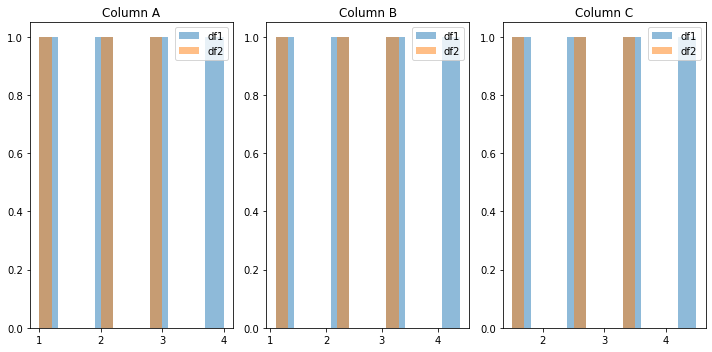

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [1.1, 2.2, 3.3, 4.4], 'C': [1.5, 2.5, 3.5, 4.5]})
df2 = pd.DataFrame({'A': [1, 2, 3], 'B': [1.1, 2.2, 3.3], 'C': [1.5, 2.5, 3.5]})

plt.figure(figsize=(10,5))

plt.subplot(131)
plt.hist(df1['A'], alpha=0.5, label='df1')
plt.hist(df2['A'], alpha=0.5, label='df2')
plt.legend()
plt.title('Column A')

plt.subplot(132)
plt.hist(df1['B'], alpha=0.5, label='df1')
plt.hist(df2['B'], alpha=0.5, label='df2')
plt.legend()
plt.title('Column B')

plt.subplot(133)
plt.hist(df1['C'], alpha=0.5, label='df1')
plt.hist(df2['C'], alpha=0.5, label='df2')
plt.legend()
plt.title('Column C')

plt.tight_layout()
plt.show()


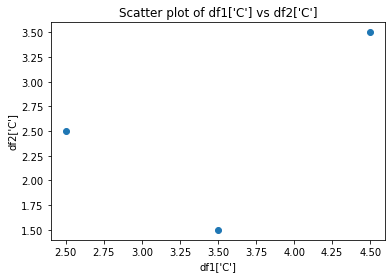

In [73]:
df1 = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [1.1, 2.2, 3.3, 4.4], 'C': [1.5, 2.5, 3.5, 4.5]})
df2 = pd.DataFrame({'A': [1, 2, 3], 'B': [1.1, 2.2, 3.3], 'C': [1.5, 2.5, 3.5]})

plt.scatter(df1['C'].sample(3), df2['C'].sample(3))
plt.xlabel('df1[\'C\']')
plt.ylabel('df2[\'C\']')
plt.title('Scatter plot of df1[\'C\'] vs df2[\'C\']')
plt.show()

In [75]:
import numpy as np

In [76]:
bins = 20
df2_C_hist, bin_edges = np.histogram(df2['C'], bins=bins)
df2_C_hist = pd.DataFrame({'bin_edges_left': bin_edges[:-1], 'bin_edges_right': bin_edges[1:], 'count': df2_C_hist})
